**Задача 2: аппроксимация функции**

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
![](https://github.com/VulpesCorsac/Coursera-Machine-Learning-Data-Analysis/tree/master/1%20-%20Mathematics%20and%20python%20for%20data%20analysis/Week%202/Tasks/2%20-%20Fit/Plot.png)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

![](https://github.com/VulpesCorsac/Coursera-Machine-Learning-Data-Analysis/tree/master/1%20-%20Mathematics%20and%20python%20for%20data%20analysis/Week%202/Tasks/2%20-%20Fit/LinearSystem.png)

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg

%matplotlib inline

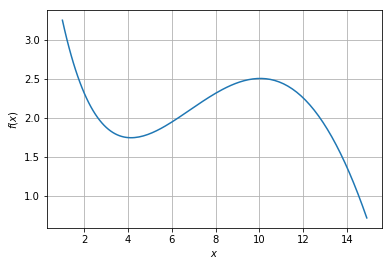

In [2]:
f = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

x = np.arange(1.0, 15.0, 0.1) # Массив значений аргумента
plt.plot(x, f(x))             # Построение графика
plt.xlabel('$x$')             # Метка по оси x в формате TeX
plt.ylabel('$f(x)$')          # Метка по оси y в формате TeX
plt.grid(True)                # Сетка
plt.show()                    # Показать график

**[1].** Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [3]:
polynomial_rank = 1
A1 = [[1 ** n for n in range(0, polynomial_rank + 1)], 
      [15 ** n for n in range(0, polynomial_rank + 1)]]
b1 = [f(1), f(15)]
p = scipy.linalg.solve(A1, b1)
print(p)

[ 3.43914511 -0.18692825]


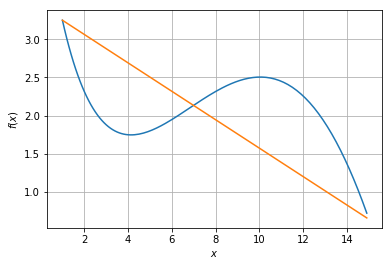

In [4]:
g = lambda x, p: p[0] + p[1] * x

x = np.arange(1.0, 15.0, 0.1) # Массив значений аргумента
plt.plot(x, f(x))             # Построение графика
plt.plot(x, g(x, p))          # Построение графика
plt.xlabel('$x$')             # Метка по оси x в формате TeX
plt.ylabel('$f(x)$')          # Метка по оси y в формате TeX
plt.grid(True)                # Сетка
plt.show()                    # Показать график

**[2].** Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [5]:
polynomial_rank = 2
A2 = [[1 ** n for n in range(0, polynomial_rank + 1)],
      [8 ** n for n in range(0, polynomial_rank + 1)],
      [15 ** n for n in range(0, polynomial_rank + 1)]]
b2 = [f(1), f(8), f(15)]
p = scipy.linalg.solve(A2, b2)
print(p)

[ 3.32512949 -0.06531159 -0.00760104]


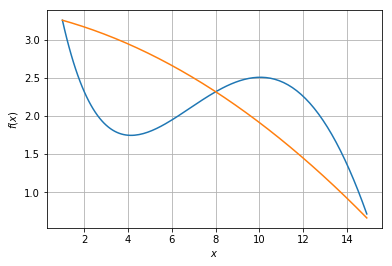

In [6]:
g = lambda x, p: p[0] + p[1] * x + p[2] * x ** 2
 
x = np.arange(1.0, 15.0, 0.1) # Массив значений аргумента
plt.plot(x, f(x))             # Построение графика
plt.plot(x, g(x, p))          # Построение графика
plt.xlabel('$x$')             # Метка по оси x в формате TeX
plt.ylabel('$f(x)$')          # Метка по оси y в формате TeX
plt.grid(True)                # Сетка
plt.show()                    # Показать график

**[3].** Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [7]:
polynomial_rank = 3
A3 = [[1 ** n for n in range(0, polynomial_rank + 1)],
      [4 ** n for n in range(0, polynomial_rank + 1)],
      [10 ** n for n in range(0, polynomial_rank + 1)],
      [15 ** n for n in range(0, polynomial_rank + 1)]]
b3 = [f(1), f(4), f(10), f(15)]
p = scipy.linalg.solve(A3, b3)
print(p)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


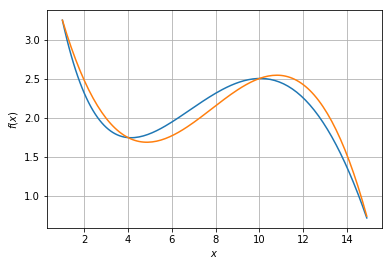

In [8]:
g = lambda x, p: p[0] + p[1] * x + p[2] * x ** 2 + p[3] * x ** 3

x = np.arange(1.0, 15.0, 0.1) # Массив значений аргумента
plt.plot(x, f(x))             # Построение графика
plt.plot(x, g(x, p))          # Построение графика
plt.xlabel('$x$')             # Метка по оси x в формате TeX
plt.ylabel('$f(x)$')          # Метка по оси y в формате TeX
plt.grid(True)                # Сетка
plt.show()                    # Показать график

In [16]:
ans = map(lambda x: x.round(2), p)
tmp = [str(p) for p in ans]
ans = ' '.join(tmp)
print(ans)

4.36 -1.3 0.19 -0.01


**[4].** Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [17]:
with open('submission-2.txt', 'w') as file:
    file.write(ans)